In [2]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

#Define a logarithmic function to fit to the data
def plot_stuff(df, title, xlabel, ylabel):
    def func(x, a, c, d):
        return a + d*np.log(x + c)

    #Fit said function
    popt, pcov = curve_fit(func, xdata=df["AF bin"], ydata=df["Alpha"], maxfev = 100000)
    sns.scatterplot(x=df["AF bin"], y=df["Alpha"])
    xx = np.linspace(0.1, 1, 100)
    yy = func(xx, *popt)
    plt.title(title, size = 18)
    plt.xlabel(xlabel, size = 15)
    plt.ylabel(ylabel, size = 15)
    plt.plot(xx, yy)


C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
v, yvalls = read_noncoding_data_fast(path = "./", maf_cut = 0.1, spec_sup = 250)

yvalls.index = yvalls["Position"]
yvalls = add_unfold(yvalls)


10549162 6483874
10326920 6229149
10030151 5801859
(10030151, 6)
(5498973, 6)
(5498973, 6)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]


0.008224107162746326


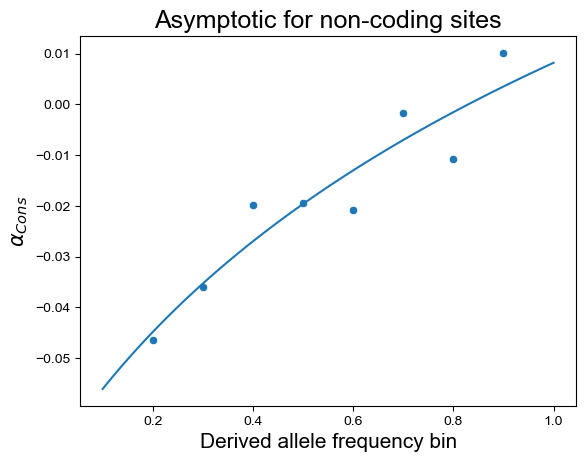

In [12]:
alpha, to_plot = asymptotic_unfold_cutoff(v, yvalls, start = 0.1, dn_cut = 0.05, to_plot_curve = False, cuttt = 0.6)
plot_stuff(to_plot, title = "Asymptotic for non-coding sites", ylabel = "$\\alpha_{Cons}$", xlabel = "Derived allele frequency bin")
print(alpha)

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\astar\AppData\Local\Temp\ipykernel_10980\4153381598.py:28: RuntimeWarning: invalid value encountered in log
  return a + d*np.log(x + c)


-0.004856250463221454


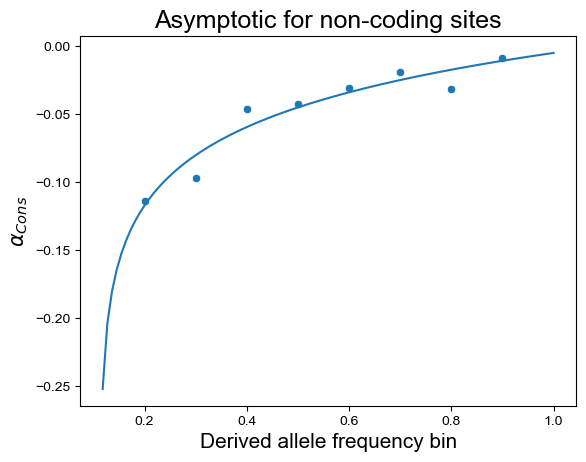

In [11]:
alpha, to_plot = asymptotic_unfold_cutoff(v, yvalls, start = 0.1, dn_cut = 0.05, to_plot_curve = False, cuttt = 0.95)
plot_stuff(to_plot, title = "Asymptotic for non-coding sites", ylabel = "$\\alpha_{Cons}$", xlabel = "Derived allele frequency bin")
print(alpha)

(-0.027310896367087723, 0.153, [[2161369, 3337604], [1150930, 1730016]], [[2164252, 3334721], [1152440, 1728506]], <Figure size 1000x600 with 1 Axes>) 1.0


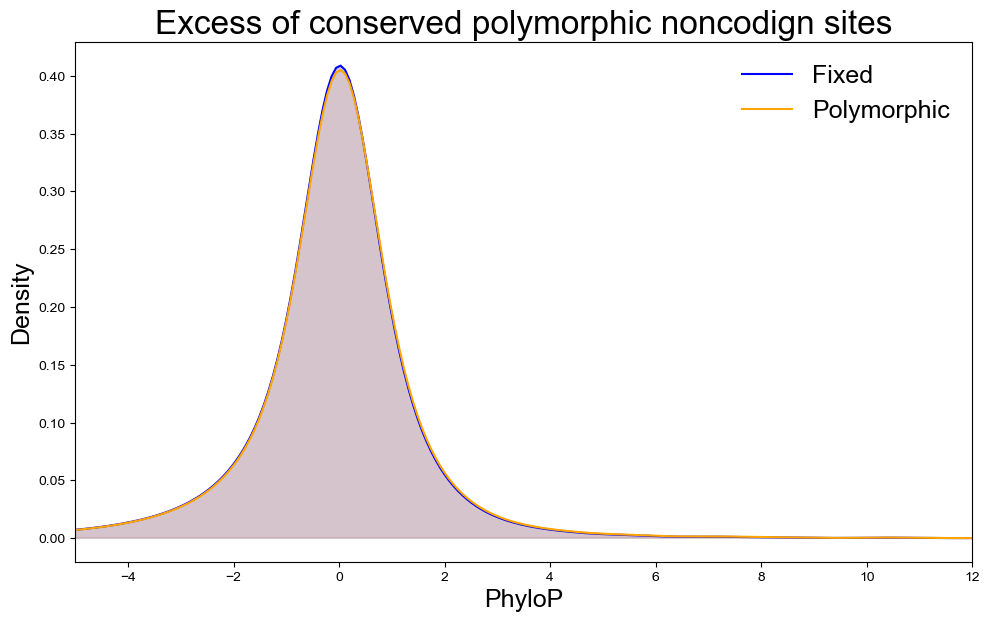

In [8]:
vvv = prepare_alpha(v, yvalls)
x2 = [np.float64(x) for x in list(v["PhyloP447"])]
yvals2 = [np.float64(j) for j in list(yvalls["PhyloP447"])]
yvals2.sort()
cuttt = 0.95
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

alpha = compute_alpha_cutoff(vvv, dn_cut = 0.01, plot = True, cutoff = cutoff, title = "Excess of conserved polymorphic noncodign sites")
table1 = alpha[2]
table2 = alpha[3]
p = (fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2
print(alpha, p)

In [3]:
#Exploring significant results from gene set
v, yvalls = read_noncoding_data_fast(path = "./", maf_cut = 0.25, spec_sup = 250)

yvalls.index = yvalls["Position"]
yvalls = add_unfold(yvalls)


10549162 6483874
10326920 6229149
10030151 5801859
(10030151, 6)
(5498973, 6)
(5498973, 6)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]


In [6]:
vv = yvalls.copy()
yvalls = 0


In [14]:
vv.index = vv["NearestGene"]

In [35]:

df = pd.read_csv("ForPub_HPO_FilterNewTEs_FisherExact_NonCod_PhyloP447_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv")
new_df = pd.DataFrame()
df = df[df["Proportion"] != 0.5]
for prop in np.unique(df["Proportion"]):
    df2 = df[df["Proportion"] == prop]
    df2["Fisher exact FDR"] = fdrcorrection(df2["Fisher exact p-value; alt greater"])[1]
    df2["MWU FDR"] = fdrcorrection(df2["MWU p-value; alt greater"])[1]
    new_df = pd.concat([new_df, df2])
df = new_df.sort_values("Fisher exact FDR")
df_sig = df[df["Fisher exact FDR"] < 0.1]
df_sig2 = df[df["MWU FDR"] < 0.1]
df_sig

C:\Users\astar\AppData\Local\Temp\ipykernel_22556\1823133833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Fisher exact FDR"] = fdrcorrection(df2["Fisher exact p-value; alt greater"])[1]
C:\Users\astar\AppData\Local\Temp\ipykernel_22556\1823133833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["MWU FDR"] = fdrcorrection(df2["MWU p-value; alt greater"])[1]
C:\Users\astar\AppData\Local\Temp\ipykernel_22556\1823133833.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Term,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Fisher exact FDR,MWU FDR
1,Increased circulating total IgE level,0.083,4152,-0.0070,798,0.000023,0.000109,0.000011,0.000055,0.327858,0.608,"[[1125, 3027], [159, 639]]","[[1125, 3027], [160, 638]]",0.8,0.018597,0.022621
3,Abnormality of the hip bone,-0.056,17547,-0.0840,4661,0.000096,0.001174,0.000048,0.000587,0.130247,0.251,"[[5787, 11760], [1396, 3265]]","[[5795, 11752], [1400, 3261]]",0.7,0.078472,0.120642
6,Flushing,0.058,4180,-0.0055,1152,0.000188,0.000138,0.000103,0.000069,0.260485,0.587,"[[1055, 3125], [230, 922]]","[[1058, 3122], [231, 921]]",0.8,0.084507,0.022621
10,Broad palm,0.116,11253,0.0740,2393,0.000308,0.019922,0.000160,0.009961,0.181200,0.837,"[[2629, 8624], [477, 1916]]","[[2629, 8624], [479, 1914]]",0.8,0.087909,0.392700


In [9]:
hpo = pd.read_csv("../DPSC_CNCC/HPO_AccelEvol_Input.txt", sep= "\t")
d_HPO = {}

for index, row in hpo.iterrows():
    d_HPO[row["Term"]] = row["Genes"].split(";")

gobp = pd.read_csv("../DPSC_CNCC/GOBP_AccelEvol_Input.txt", sep= "\t")
d_BP = {}

for index, row in gobp.iterrows():
    if "ucus" in row["Term"]:
        print(row["Term"])
    d_BP[row["Term"]] = row["Genes"].split(";")
    
kegg = pd.read_csv("../DPSC_CNCC/KEGG_AccelEvol_Input.txt", sep= "\t")
d_KEGG = {}

for index, row in kegg.iterrows():
    if "ucus" in row["Term"]:
        print(row["Term"])
    d_KEGG[row["Term"]] = row["Genes"].split(";")

In [51]:
vk

,Position,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
NearestGene,,,,,,,,,
ADA,chr20:44592441,ADA,59275,0.063,0.000,284,Fixed,.,.
ADA,chr20:44592515,ADA,59201,-0.731,0.000,283,Fixed,.,.
ADA,chr20:44592766,ADA,58950,0.157,0.000,252,Fixed,.,.
ADA,chr20:44592768,ADA,58948,0.687,0.009,252,Fixed,.,.
ADA,chr20:44593358,ADA,58358,0.069,0.000,253,Fixed,.,.
...,...,...,...,...,...,...,...,...,...
WAS,chrX:48688179,WAS,4363,0.333,0.000,411,Fixed,.,.
WAS,chrX:48688317,WAS,4501,-9.076,0.000,431,Fixed,.,.
WAS,chrX:48688459,WAS,4643,0.113,0.001,428,Fixed,.,.


In [55]:
1.1311815253031964e-04

0.00011311815253031964

1.1311815253031964e-05
SignificanceResult(statistic=1.4936327767077435, pvalue=9.34667023666244e-06)


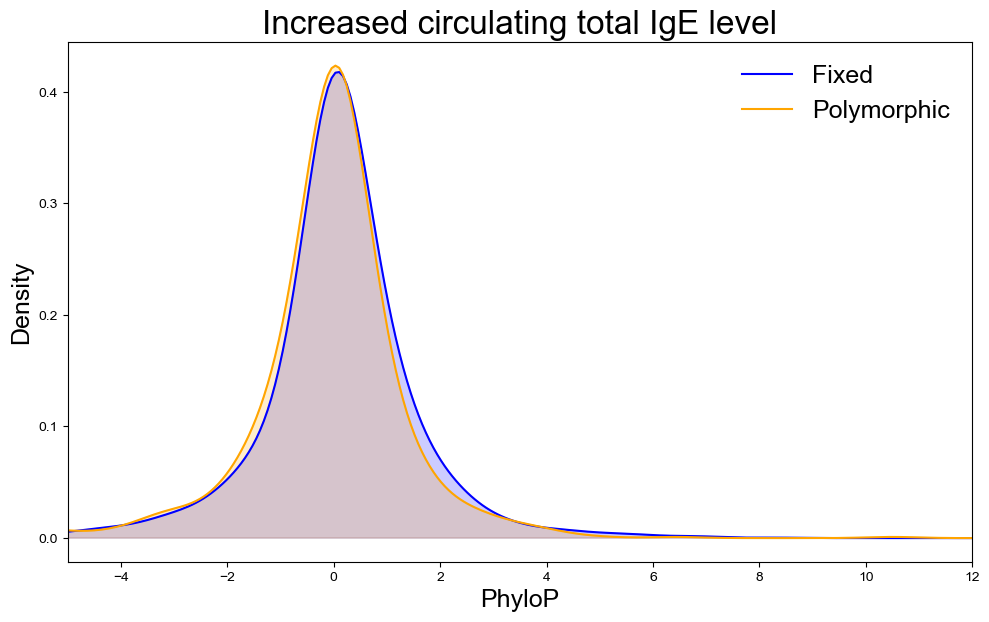

In [53]:
key = "Increased circulating total IgE level"

vk = v.loc[np.intersect1d(v.index, d_HPO[key])]
vvk = vv.loc[np.intersect1d(vv.index, d_HPO[key])]
x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
yvals2.sort()
if len(vk.index) >= 100 and len(vvk.index) >= 50:
    #vvk = vvk[~vvk["NearestGene"].isin(["SHOX"])]
    vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
    cuttt = 0.8
    cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
    alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, title = "Increased circulating total IgE level")

    table1 = alpha[2]
    table2 = alpha[3]
    print((fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2)
    print((fisher_exact(table1, alternative = "greater")))

0.7636926519838763


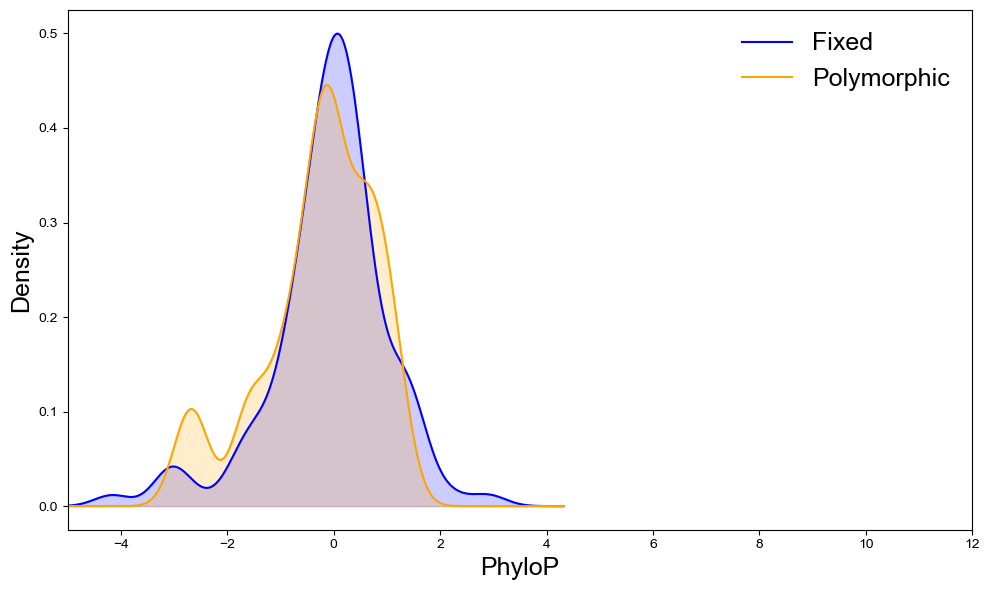

In [52]:

vk = v.loc["PLA2G7"].copy()
vvk = vv.loc["PLA2G7"].copy()
x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]
yvals2.sort()
vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
cuttt = 0.7
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff)

table1 = alpha[2]
table2 = alpha[3]
print((fisher_exact(table1, alternative = "greater")[1] + fisher_exact(table2, alternative = "greater")[1])/2)

In [62]:
v = pd.read_csv("../Myriad_RNA/CM_Filtered.txt", sep = "\t").set_index("gene")
v = v[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
v.columns = ["L2FC CM", "padj CM", "pvalue CM"]
vv = pd.read_csv("../Myriad_RNA/PP_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC PP", "padj PP", "pvalue PP"]
v = v.join(vv).dropna()

vv = pd.read_csv("../Myriad_RNA/RPE_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC RPE", "padj RPE", "pvalue RPE"]
v = v.join(vv).dropna()

vv = pd.read_csv("../Myriad_RNA/SKM_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC SKM", "padj SKM", "pvalue SKM"]
v = v.join(vv).dropna()

vv = pd.read_csv("../Myriad_RNA/HP_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC HP", "padj HP", "pvalue HP"]
v = v.join(vv).dropna()

vv = pd.read_csv("../Myriad_RNA/MN_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC MN", "padj MN", "pvalue MN"]
v = v.join(vv).dropna()
v["Var"] = np.var(v[["L2FC MN", "L2FC HP", "L2FC CM", "L2FC RPE", "L2FC SKM", "L2FC HP"]], axis = 1)/np.sum(np.abs(v[["L2FC MN", "L2FC HP", "L2FC CM", "L2FC RPE", "L2FC SKM", "L2FC HP"]]), axis = 1)

#v_dif = v[v["padj RPE"] < 0.05]

vk_use = vk.loc[np.intersect1d(v.index, vk.index)]
v_dif_use = v_dif.loc[np.intersect1d(v_dif.index, vk.index)]



In [69]:
v2 = v.loc[np.intersect1d(v.index, vk.index)]
v2

,L2FC CM,padj CM,pvalue CM,L2FC PP,padj PP,pvalue PP,L2FC RPE,padj RPE,pvalue RPE,L2FC SKM,padj SKM,pvalue SKM,L2FC HP,padj HP,pvalue HP,L2FC MN,padj MN,pvalue MN,Var
gene,,,,,,,,,,,,,,,,,,,
CASP10,-1.460470,4.936325e-16,2.530469e-17,0.378946,2.430997e-02,9.664068e-03,-0.972268,4.032308e-03,1.000708e-03,-0.629207,0.025436,4.760781e-03,0.767433,1.101527e-09,1.323866e-10,0.046840,8.413099e-01,7.559097e-01,0.153941
DOCK8,-0.098401,7.847524e-01,6.519440e-01,0.368944,2.411050e-02,9.580293e-03,1.588239,2.152241e-13,1.044364e-14,-0.000995,1.000000,9.938511e-01,0.634017,3.909267e-06,7.296831e-07,0.086468,8.064823e-01,7.087203e-01,0.109363
FAS,-0.006500,9.858208e-01,9.699735e-01,0.095076,7.467614e-01,6.379869e-01,-0.915260,1.280630e-03,2.746073e-04,-0.220863,0.473954,2.377213e-01,-0.420607,1.886842e-01,1.077729e-01,0.016600,9.674049e-01,9.463898e-01,0.049624
FOXP3,0.139493,6.901176e-01,5.311884e-01,0.253868,4.624547e-01,3.334588e-01,0.144537,7.076897e-01,5.474761e-01,0.023927,0.957735,8.905653e-01,0.518472,1.998816e-01,1.160136e-01,0.049795,8.914300e-01,8.283754e-01,0.030691
GPC3,-0.069796,5.097969e-01,3.452277e-01,0.576312,2.695693e-16,1.444091e-17,0.218877,6.036215e-02,2.271908e-02,-0.230253,0.452477,2.215099e-01,0.755402,7.950418e-27,2.731507e-28,-0.264071,1.127428e-01,5.379888e-02,0.079226
GPC4,-0.865466,3.117962e-06,4.657637e-07,-0.285333,1.889147e-02,7.247952e-03,-0.271217,1.018409e-01,4.268620e-02,-0.786508,0.001499,1.631971e-04,0.361220,3.976352e-03,1.302427e-03,0.577473,1.375133e-01,6.839245e-02,0.101914
IL4R,-0.635966,5.077574e-12,3.724441e-13,0.299381,7.192762e-06,1.314538e-06,0.164706,2.021851e-01,9.972219e-02,-0.643481,0.000423,3.774029e-05,0.847346,3.324679e-23,1.410767e-24,0.557347,6.735093e-02,2.904919e-02,0.107169
PGM3,-0.369487,7.102648e-09,7.341150e-10,0.064647,4.909668e-01,3.600991e-01,-0.164893,2.157800e-02,6.803957e-03,-0.110508,0.595819,3.471831e-01,0.140425,1.095358e-01,5.640733e-02,-0.101170,3.956274e-01,2.609841e-01,0.030760
PLA2G7,-3.579965,1.501729e-11,1.143553e-12,-2.090703,1.099295e-40,1.613507e-42,-3.064844,1.764580e-16,6.159942e-18,-3.293020,0.000001,5.719086e-08,-2.523148,5.827585e-32,1.580071e-33,-2.468812,1.104079e-14,6.203272e-16,0.010633


In [17]:
from collections import Counter
Counter(vk.index)

Counter({'ADA': 209,
         'CASP10': 56,
         'DOCK8': 40,
         'FAS': 57,
         'FASLG': 470,
         'FOXP3': 36,
         'GPC3': 633,
         'GPC4': 609,
         'IL4R': 131,
         'IL7R': 376,
         'KRT1': 109,
         'KRT9': 44,
         'MS4A2': 40,
         'PGM3': 293,
         'PLA2G7': 105,
         'PRKCD': 144,
         'RASGRP1': 364,
         'SPINK5': 287,
         'STAT3': 88,
         'TYK2': 28,
         'WAS': 33})

In [40]:
Counter(vk.index)

Counter({'ARID1A': 139,
         'ARID1B': 2594,
         'ARID2': 743,
         'ARX': 1213,
         'BMPR1B': 1210,
         'CCDC22': 23,
         'COMP': 65,
         'DPF2': 26,
         'ERGIC1': 249,
         'GLE1': 69,
         'GUSB': 64,
         'KIF1A': 138,
         'MYBPC1': 313,
         'MYH3': 180,
         'NALCN': 1113,
         'NXN': 202,
         'PEPD': 385,
         'PHF6': 71,
         'PLOD1': 41,
         'ROR2': 574,
         'SCN9A': 449,
         'SMARCA4': 84,
         'SMARCC2': 29,
         'SMARCE1': 144,
         'SOX11': 4014,
         'SOX4': 2156,
         'TNNI2': 70,
         'TNNT3': 87,
         'TPM2': 81,
         'VDR': 175,
         'VPS13B': 585,
         'WNK1': 261})